In [3]:
# data import
import pandas as pd
import numpy as np
import math
from pandas import Series, DataFrame
import scipy
#from scipy.stats import spearmanrs
import matplotlib.pyplot as plt
import sklearn
f=pd.read_csv('HW1_dataset.csv')
C=list(f.columns)
#print(C)
##partitioning
f = sklearn.utils.shuffle(f)
df1=f[0:50]
df2=f[50:100]
df3=f[100:150]
df4=f[150:200]
df5=f[200:250]
#print (df1.head)



#rint(X1.shape)
train1=np.concatenate((df2,df3,df4,df5), axis=0)
train2=np.concatenate((df1,df3,df4,df5), axis=0)
train3=np.concatenate((df1,df2,df4,df5), axis=0)
train4=np.concatenate((df1,df2,df3,df5), axis=0)
train5=np.concatenate((df1,df2,df3,df4), axis=0)
#train, validate, test = np.split(f.sample(frac=0), [int(.6*len(f)), int(.8*len(f))])
#print(train.shape)
#print(validate.shape)
#print(test.shape)
#print(C)

In [4]:
#k folds
#from sklearn.model_selection import KFold # import KFold
def splitXY(f):
    X, Y = np.split(f,[-1],axis=1)
    #print(X)
    #print(X.shape)
    #Y = f[:,6:7]
    
    X=np.array(X).astype(np.float32)
    Y=np.array(Y).astype(np.float32)
    bias = np.ones((X.shape[0], 1))
    X = np.hstack((bias, X))
    #print(X.shape)
    #print(Y.shape)
    return (X,Y)
#kf = KFold(n_splits=5) # Define the split - into 5 folds 
#kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
#print(kf) 
#print(X)
#print(X.shape)

In [5]:
#definitions
def initialize(column):
    theta=np.zeros(column)
    h=np.zeros(150)
    s=np.zeros(150)
    h=np.expand_dims(h, axis = 1)
    s=np.expand_dims(s, axis = 1)
    count=0
    #count=np.expand_dims(count, axis = 1)
    lr=0.005
    max_count = 100
    iters =0
    #iters=np.expand_dims(iters, axis = 1)
    theta=np.zeros(column)
    #theta=np.expand_dims(theta, axis = 1)
    #print('theta',theta.shape)
    #prev_theta=np.zeros(7)
    #prev_theta=prev_theta.expand_dims(prev_theta, axis = 1)
    error=1
    #error=np.expand_dims(error, axis = 1)
    prev_error=1
    #prev_error=np.expand_dims(prev_error, axis = 1)
    #print('h',h.shape)
    #print("s",s.shape)
    return (theta,h,s,count,lr,max_count, iters, theta, error,prev_error)
'''def Model_output()
    t0,t1,t2,t3,t4,t5,t6,y=np.split(XY_test,[-2],axis=7)
    return XY_test'''
'''def model1(t0,t1,t2,t3,t4,t5,t6,y) 
    t0,t1,t2,t3,t4,t5,t6,y=split_col()
    return y'''
def sigmoid(th,x):
    q=(np.dot(x,th.T))
    return ( (1) / (1 + np.exp(-q)))
#H=h.reshape(250,1)
def gradient(th, x, y):
    h=sigmoid(th,x)
    s=(h - y)
    return (np.dot((s).T,x))
def ERROR(th,x,y):
    h=sigmoid(th,x)
    return((h - y)**2).mean(axis=None)

    
    #print((sigmoid(theta,X)).shape)

print()
#print('Error',((s - Y)).shape)
#print('X',X.shape)
#print('G',gradient(theta, X,Y).shape)    


0.006581727943801111
0.0038847932163377542
0.005029168262499613
0.008646978965084099
0.01158326009110809


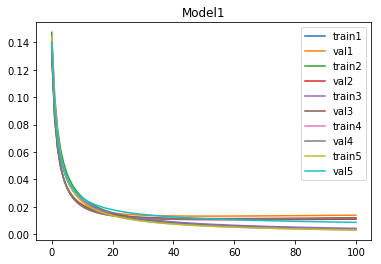

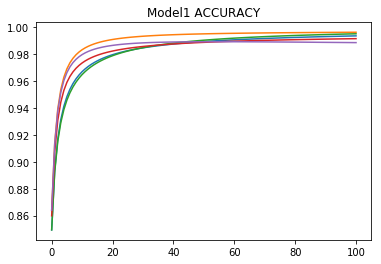

0.007644321451637636
0.0026609866151594145
0.0044510454480719145
0.006865752126431478
0.01353659258261917


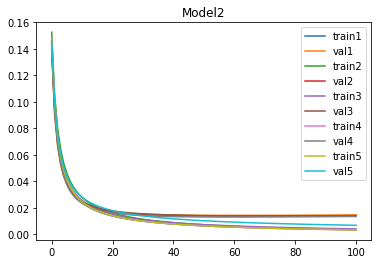

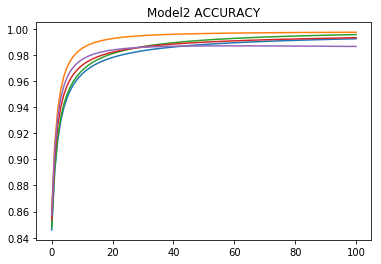

0.01983604710136161
0.0180967062905895
0.007148711113989266
0.016674158206794704
0.002493866503508151


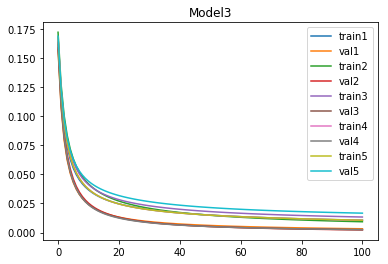

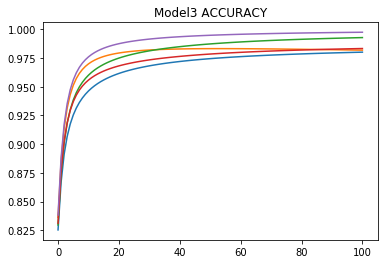

0.027531540543938315
0.047311012955868925
0.013561038665670332
0.01027056408529507
0.009392928728196711


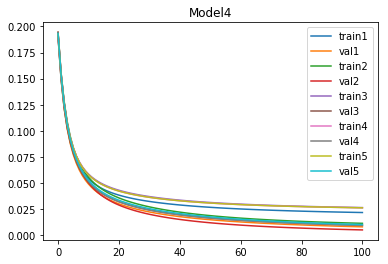

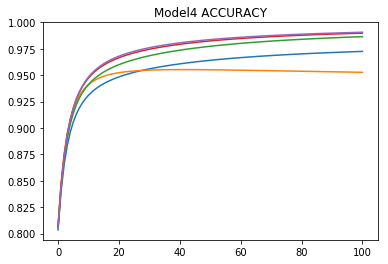

In [6]:

#theta= theta-(lr*gradient(theta, X,Y))# h is a single value and y is a single value #plot MSE vs iters
#print(theta)
#early stopping procedure

#for i in range(1,5):
    #train_x=train.iloc[:,0:6]
    #train_y=train.iloc[:,6:7]
    #validate_x=validate.iloc[:,0:6]
    #validate_y=validate.iloc[:,6:7]
    #test_x=test.iloc[:,0:6]
    #test_y=test.iloc[:,6:7]
def train_Sig(f, test):
    train, validate = np.split(f, [int(.75*len(f))])
    trainX,trainY=splitXY(train)
    #f1,f2,f3,f4,f5,f6,f7=splitXY(:,test)
    testX,testY=splitXY(test)
    valX,valY=splitXY(validate)
    theta,h,s,count,lr,max_count, iters, theta, error,prev_error=initialize(len(test.columns))
    #early stopping
    #for j in range(0,6):
    iters=0
    list_tr=list()
    list_val=list()
    list_test=list()
    while(count<max_count or iters<5):
        prev_error =error
        #prev_theta[j]=theta[j]
        theta= theta-(lr*gradient(theta, trainX,trainY))# h is a single value and y is a single value #plot MSE vs iters
        error = ERROR(theta,trainX,trainY)
        error_val = ERROR(theta,valX,valY) 
        error_test =1- ERROR(theta,testX,testY) 
        list_test.append(error_test)
        list_tr.append(error)
        list_val.append(error_val)
        #print (error.shape)
        #print(prev_error)
        #print (error)
        #print(error)
        if (error<prev_error):
            count = count+1
            if count>max_count:
               # print("count reached max_count")
                break;
            #print("count")
        else:
            iters=iters+1
            if iters>5:
                break;
           # print("iters")
    #print (list_tr)
    #error = ERROR(theta,testX,testY)
    #plt.plot(list_tr,label="train")
    #plt.plot(list_val,label="val")
    #plt.legend(loc='best')

    #plt.show()
    error_test = ERROR(theta,testX,testY) 
    print (error_test)
    return (list_tr,list_val,list_test)
#print(theta.shape)  
#model calling
tr1,val1,test1=train_Sig(train1,df1)
tr2,val2,test2=train_Sig(train2,df2)
tr3,val3,test3=train_Sig(train3,df3)
tr4,val4,test4=train_Sig(train4,df4)
tr5,val5,test5=train_Sig(train5,df5)
###Plotting Vali and Train for 5 folds
#Model 1
#plt.figure(1)
#plt.subplot(221)

plt.plot(tr1,label="train1")
plt.plot(val1,label="val1")

#print("train2")
  
plt.plot(tr2,label="train2")
plt.plot(val2,label="val2")
#print("train3")

plt.plot(tr3,label="train3")
plt.plot(val3,label="val3")
#print("train4")

plt.plot(tr4,label="train4")
plt.plot(val4,label="val4")
#print("train5")

plt.plot(tr5,label="train5")
plt.plot(val5,label="val5")
#print("train end")
plt.legend(loc='best')
plt.title("Model1")
plt.show()
#plt.subplot(222)
plt.plot(test1,label="train1")
plt.plot(test2,label="train2")
plt.plot(test3,label="train3")
plt.plot(test4,label="train4")
plt.plot(test5,label="train5")
plt.title("Model1 ACCURACY")
plt.show()
#Model 2
#print (train1)
#train=train1[:,2:7]
#DF1=df1.iloc[:,2:7]
#print(DF1)
#plt.subplot(223)
tr1,val1,test1=train_Sig(train1[:,2:7],df1.iloc[:,2:7])
plt.plot(tr1,label="train1")
plt.plot(val1,label="val1")

#print("train2")
tr2,val2,test2=train_Sig(train2[:,2:7],df2.iloc[:,2:7])  
plt.plot(tr2,label="train2")
plt.plot(val2,label="val2")
#print("train3")
tr3,val3,test3=train_Sig(train3[:,2:7],df3.iloc[:,2:7])
plt.plot(tr3,label="train3")
plt.plot(val3,label="val3")
#print("train4")
tr4,val4,test4=train_Sig(train4[:,2:7],df4.iloc[:,2:7])
plt.plot(tr4,label="train4")
plt.plot(val4,label="val4")
#print("train5")
tr5,val5,test5=train_Sig(train5[:,2:7],df5.iloc[:,2:7])
plt.plot(tr5,label="train5")
plt.plot(val5,label="val5")
#print("train end")
plt.legend(loc='best')
plt.title("Model2")
plt.show()
#plt.subplot(224)
plt.plot(test1,label="train1")
plt.plot(test2,label="train2")
plt.plot(test3,label="train3")
plt.plot(test4,label="train4")
plt.plot(test5,label="train5")
plt.title("Model2 ACCURACY")
plt.show()

#MODEL3

#plt.subplot(225)
tr1,val1,test1=train_Sig(train1[:,3:7],df1.iloc[:,3:7])
plt.plot(tr1,label="train1")
plt.plot(val1,label="val1")

#print("train2")
tr2,val2,test2=train_Sig(train2[:,3:7],df2.iloc[:,3:7])  
plt.plot(tr2,label="train2")
plt.plot(val2,label="val2")
#print("train3")
tr3,val3,test3=train_Sig(train3[:,3:7],df3.iloc[:,3:7])
plt.plot(tr3,label="train3")
plt.plot(val3,label="val3")
#print("train4")
tr4,val4,test4=train_Sig(train4[:,3:7],df4.iloc[:,3:7])
plt.plot(tr4,label="train4")
plt.plot(val4,label="val4")
#print("train5")
tr5,val5,test5=train_Sig(train5[:,3:7],df5.iloc[:,3:7])
plt.plot(tr5,label="train5")
plt.plot(val5,label="val5")
#print("train end")
plt.legend(loc='best')
plt.title("Model3")
plt.show()

#plt.subplot(226)
plt.plot(test1,label="train1")
plt.plot(test2,label="train2")
plt.plot(test3,label="train3")
plt.plot(test4,label="train4")
plt.plot(test5,label="train5")
plt.title("Model3 ACCURACY")
plt.show()
#MODEL4
#plt.subplot(227)
tr1,val1,test1=train_Sig(train1[:,4:7],df1.iloc[:,4:7])
plt.plot(tr1,label="train1")
plt.plot(val1,label="val1")

#print("train2")
tr2,val2,test2=train_Sig(train2[:,4:7],df2.iloc[:,4:7])  
plt.plot(tr2,label="train2")
plt.plot(val2,label="val2")
#print("train3")
tr3,val3,test3=train_Sig(train3[:,4:7],df3.iloc[:,4:7])
plt.plot(tr3,label="train3")
plt.plot(val3,label="val3")
#print("train4")
tr4,val4,test4=train_Sig(train4[:,4:7],df4.iloc[:,4:7])
plt.plot(tr4,label="train4")
plt.plot(val4,label="val4")
#print("train5")
tr5,val5,test5=train_Sig(train5[:,4:7],df5.iloc[:,4:7])
plt.plot(tr5,label="train5")
plt.plot(val5,label="val5")
#print("train end")
plt.legend(loc='best')
plt.title("Model4")
plt.show()
#plt.subplot(228)
plt.plot(test1,label="train1")
plt.plot(test2,label="train2")
plt.plot(test3,label="train3")
plt.plot(test4,label="train4")
plt.plot(test5,label="train5")
plt.title("Model4 ACCURACY")
plt.show()
#accuracy=ERROR(theta,X,y)'''